# Entrenamiento de red neuronal multicapa para clasificacion

##### [Data Source:](https://www.kaggle.com/datasets/hojjatk/mnist-dataset?phase=FinishSSORegistration&returnUrl=%2Fdatasets%2Fhojjatk%2Fmnist-dataset%2Fversions%2F1%3Fresource%3Ddownload&SSORegistrationToken=CfDJ8LRqC2zgEF1Isw0Bk0-7U-4MJq2ILrMgh2UvSD-rCCFemukVTjrFusXTp4MxRRLkn2m904i6uwjNsEf4OyC2vQulM8ICMo8kLxnonXEBEFz9KFYM2O1asemi6A0fACc0_4uzsAgGwFnwtvq-WRc2a_vC89MgfFPA31VCy6XLoO-PO4rEvsuL-XG6nUM0qRhTMD-oLsU5Z3khAuPQJAZpaTLhxCim70lrfsV-vbyJUM7ZvJCU5VowT0c7V8VlSply_61VKjCwa817fi1aehv4CKe2t49Jq8zSspoaia2MkLW6dy_ZGKxDMVR46-HYoqcqUvImIO2fSbiJlA7sFk-YBTMMO6NIZiiy&DisplayName=Adrian+Martinez&select=train-labels.idx1-ubyte#) La data se tomo de Kaggle. aunque tambien tensorflow tiene un objeto con este data set.

- train-images-idx3-ubyte.gz: training set images (9912422 bytes)
- train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
- t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
- t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

##### Este data contiene 60k imagenes las cuales tienen diferentes formas de como son escritos los numero de 0 al 9, en este projecto realizaremos la clasificacion mediante una red neuronal multicapa, con tensorflow. 

##### EXTRACCION DE LA DATA

In [28]:
#Librerias
import os
from pathlib import Path
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [2]:
def load_mnist(path, kind='train'):
    """Carga Mnist data from ´path´"""
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte' % kind)
    img_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n =struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)

    with open(img_path, 'rb') as imgpath:
        magic,num,rows,cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
        images = ((images/255.)-.5)*2
    return images, labels

In [3]:
#Capturamos la ruta
root=Path('.').resolve().parent
datapath=os.path.join(root,'data','raw')
datapath

'C:\\Users\\ingva\\OneDrive\\Documents\\EstudioML\\data\\raw'

In [4]:
#Extraemos los datos de entrenamiento
X_train, y_train = load_mnist(datapath, kind='train')
print('X_train -- Rows: %d, Columns: %d' %(X_train.shape[0],X_train.shape[1]))
print('y_train -- Rows:%d' %(len(y_train)))

X_train -- Rows: 60000, Columns: 784
y_train -- Rows:60000


In [5]:
#Extraemos los datos de entrenamiento
X_test, y_test = load_mnist(datapath, kind='t10k')
print('X_test -- Rows: %d, Columns: %d' %(X_test.shape[0],X_test.shape[1]))
print('y_test -- Rows:%d' %(len(y_test)))

X_test -- Rows: 10000, Columns: 784
y_test -- Rows:10000


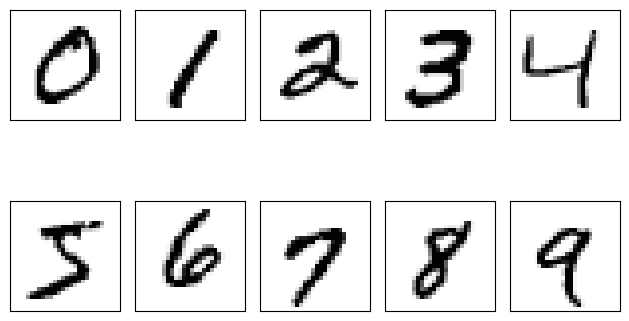

In [6]:
#visualimos las imagenes

fig, ax =plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

ax =ax.flatten()

for i in range(10):
    img= X_train[y_train==i][0].reshape(28,28)
    ax[i].imshow(img,cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [7]:
# comprimimos para guardar las imagenes
"""
np.savez_compressed('mnist_scaled.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)
                    """

"\nnp.savez_compressed('mnist_scaled.npz',\n                    X_train=X_train,\n                    y_train=y_train,\n                    X_test=X_test,\n                    y_test=y_test)\n                    "

In [10]:
#para carga los datos
mnist =np.load('mnist_scaled.npz')

In [11]:
#vemos los files
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [13]:
#normailizacion
mean = np.mean(mnist['X_train'])
std = np.std(mnist['X_train'])

mean_t = np.mean(mnist['X_test'])
std_t = np.std(mnist['X_test'])

print(mean)
print(mean_t)

-0.7386790474523132
-0.7349707883153263


In [14]:
X_train_n=(mnist['X_train'] - mean)/std
X_test_n=(mnist['X_test'] - mean_t)/std_t

In [22]:
np.random.seed(123)
tf.random.set_seed(123)

y_train_ohc = tf.keras.utils.to_categorical(mnist['y_train'])
print('first 3 labels: ',mnist['y_train'][:3])

print('first 3 labels:\n',y_train_ohc[:3])

first 3 labels:  [5 0 4]
first 3 labels:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [53]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=50,
        input_shape=[X_train_n.shape[1]],
        kernel_initializer ='glorot_uniform',
        bias_initializer = 'zeros',
        activation = 'tanh'
    )
)

model.add(
    tf.keras.layers.Dense(
        units=50,
        input_shape=[50],
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation='tanh'
    )
)

model.add(
    tf.keras.layers.Dense(
        units=y_train_ohc.shape[1],
        input_shape=[50],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation = 'softmax'
    )
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.001, decay=1e-1, momentum =.9)

model.compile(optimizer=sgd,loss='categorical_crossentropy')

c:\Users\ingva\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ingva\anaconda3\lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [54]:
history = model.fit(X_train_n,y_train_ohc,batch_size=64, epochs=50,verbose=1,validation_split=0.1)

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1882 - val_loss: 0.3539
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3795 - val_loss: 0.2638
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2978 - val_loss: 0.2250
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2558 - val_loss: 0.2006
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2268 - val_loss: 0.1834
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2046 - val_loss: 0.1705
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1870 - val_loss: 0.1604
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1725 - val_loss: 0.1523
Epoch 9/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1603 - val_loss: 0.1456
Epoch 10/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1500 - val_loss: 0.1400
Epoch 11/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1410 - val_loss: 0.1352
Epoch 12/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [64]:
y_train_pred=np.argmax(model.predict(X_train_n, verbose=0),axis=1)
print('frist 3 predicts:', y_train_pred[:3])

frist 3 predicts: [5 0 4]


In [62]:
y_train_pred=model.predict(X_train_n, verbose=0)
print('frist 3 predicts:', y_train_pred[:3])

frist 3 predicts: [[4.5364472e-06 1.7618695e-05 1.3317505e-04 2.1955863e-01 3.6782560e-06
  7.8006607e-01 1.0926719e-06 1.5908014e-05 1.6948748e-04 2.9768131e-05]
 [9.9974662e-01 3.0917701e-07 2.6782414e-05 9.6678001e-08 2.7028148e-07
  1.1687703e-05 1.0652318e-04 1.2469475e-06 3.7940452e-05 6.8563961e-05]
 [7.4046392e-07 4.7097442e-06 3.5160064e-04 1.5202985e-04 9.9907035e-01
  4.4877775e-06 2.0717720e-05 2.2310762e-04 1.7153261e-05 1.5518224e-04]]


In [65]:
correct_predict_train = np.sum(y_train==y_train_pred)
correct_predict_train

59451

In [67]:
train_accuracy = correct_predict_train/y_train.shape[0]
train_accuracy

0.99085

In [68]:
#prediccion test

y_test_predict =np.argmax(model.predict(X_test_n, verbose=0), axis=1)
correct_test =np.sum(y_test==y_test_predict)
test_accuracy = correct_test/y_test.shape[0]
test_accuracy

0.9677